<a href="https://colab.research.google.com/github/plaban1981/Handle-Imbalanced-Datasets-Techniques/blob/master/Underwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

Underwriting (UW) is perhaps one of the most critical functions of Insurance Industry. Significant amount of cost and efforts are dedicated for this. With the advent of widespread use of Artificial Intelligence, there has been lot of interest in leveraging AI for UW. It has the potential to become a potent aid for Underwriters - less need of UW Resources per application, expedited UW processes, significant Cost and time savings. 


# Problem Description


Prudential Life Insurance made available their UW dataset for 60,000 customers. 

The dataset had 8 risk classes, coded as 1 to 8, with 1 being the highest risk. 


There are 126 inputs available, pertaining to health, weight, medical test, employment history, family history etc. 


The variables are masked by naming them in generic fashion like MEDICAL_KEYWORD, EMPLOYEMENT_INFO etc. 



#### The objective is to develop a predictive model which can classify these risk classes with very high degree of accuracy, maintaining reasonably high precision and recall within each classes. 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(13), int64(114), object(1)
memory usage: 58.0+ MB


In [49]:
df_train.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

In [50]:
df_train.dtypes.value_counts()

int64      114
float64     13
object       1
dtype: int64

In [51]:
string_cols = []
for i in df_train.columns:
  if df_train[i].dtypes == 'object':
    string_cols.append(i)
string_cols

['Product_Info_2']

In [52]:
df_train.shape

(59381, 128)

In [53]:
df_test.shape

(19765, 127)

#### checking for null values

In [54]:
df_train.isnull().sum()[df_train.isnull().sum() !=0]

Series([], dtype: int64)

**No null Values detected in the training set**

**This implies that test data has null values**

In [55]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [56]:
df_train.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [57]:
for cols in df_train.columns:
  print(cols,":",df_train[cols].count())

Id : 59381
Product_Info_1 : 59381
Product_Info_2 : 59381
Product_Info_3 : 59381
Product_Info_4 : 59381
Product_Info_5 : 59381
Product_Info_6 : 59381
Product_Info_7 : 59381
Ins_Age : 59381
Ht : 59381
Wt : 59381
BMI : 59381
Employment_Info_1 : 59381
Employment_Info_2 : 59381
Employment_Info_3 : 59381
Employment_Info_4 : 59381
Employment_Info_5 : 59381
Employment_Info_6 : 59381
InsuredInfo_1 : 59381
InsuredInfo_2 : 59381
InsuredInfo_3 : 59381
InsuredInfo_4 : 59381
InsuredInfo_5 : 59381
InsuredInfo_6 : 59381
InsuredInfo_7 : 59381
Insurance_History_1 : 59381
Insurance_History_2 : 59381
Insurance_History_3 : 59381
Insurance_History_4 : 59381
Insurance_History_5 : 59381
Insurance_History_7 : 59381
Insurance_History_8 : 59381
Insurance_History_9 : 59381
Family_Hist_1 : 59381
Family_Hist_2 : 59381
Family_Hist_3 : 59381
Family_Hist_4 : 59381
Family_Hist_5 : 59381
Medical_History_1 : 59381
Medical_History_2 : 59381
Medical_History_3 : 59381
Medical_History_4 : 59381
Medical_History_5 : 59381
Medi

**Hence confirmed no null values**

In [58]:
df_test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [59]:
for cols in df_test.columns:
  print(cols,":",df_test[cols].count())

Id : 19765
Product_Info_1 : 19765
Product_Info_2 : 19765
Product_Info_3 : 19765
Product_Info_4 : 19765
Product_Info_5 : 19765
Product_Info_6 : 19765
Product_Info_7 : 19765
Ins_Age : 19765
Ht : 19765
Wt : 19765
BMI : 19765
Employment_Info_1 : 19765
Employment_Info_2 : 19765
Employment_Info_3 : 19765
Employment_Info_4 : 19765
Employment_Info_5 : 19765
Employment_Info_6 : 19765
InsuredInfo_1 : 19765
InsuredInfo_2 : 19765
InsuredInfo_3 : 19765
InsuredInfo_4 : 19765
InsuredInfo_5 : 19765
InsuredInfo_6 : 19765
InsuredInfo_7 : 19765
Insurance_History_1 : 19765
Insurance_History_2 : 19765
Insurance_History_3 : 19765
Insurance_History_4 : 19765
Insurance_History_5 : 19765
Insurance_History_7 : 19765
Insurance_History_8 : 19765
Insurance_History_9 : 19765
Family_Hist_1 : 19765
Family_Hist_2 : 19765
Family_Hist_3 : 19765
Family_Hist_4 : 19765
Family_Hist_5 : 19765
Medical_History_1 : 16793
Medical_History_2 : 19765
Medical_History_3 : 19765
Medical_History_4 : 19765
Medical_History_5 : 19765
Medi

In [60]:
df_test.isnull().sum()[df_test.isnull().sum() !=0]

Medical_History_1      2972
Medical_History_10    19564
Medical_History_15    14864
Medical_History_24    18585
Medical_History_32    19414
dtype: int64

**Impute missing values with mean/ median / mode.**

In [0]:
missing_data_cols = ['Medical_History_1', 'Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']

In [62]:
df_test[missing_data_cols].head(10)


,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,2.0,NaN,NaN,NaN,NaN
1,5.0,NaN,110.0,NaN,NaN
2,3.0,NaN,240.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,18.0,NaN,188.0,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN
6,21.0,NaN,82.0,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN
8,2.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [0]:
df_test[missing_data_cols] = df_test[missing_data_cols].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [64]:
df_test[missing_data_cols].head(10)

,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,2.0,240.0,240.0,0.0,0.0
1,5.0,240.0,110.0,0.0,0.0
2,3.0,240.0,240.0,0.0,0.0
3,1.0,240.0,240.0,0.0,0.0
4,18.0,240.0,188.0,0.0,0.0
5,4.0,240.0,240.0,0.0,0.0
6,21.0,240.0,82.0,0.0,0.0
7,0.0,240.0,240.0,0.0,0.0
8,2.0,240.0,240.0,0.0,0.0
9,1.0,240.0,240.0,0.0,0.0


In [65]:
df_train['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_train['Product_Info_2'])
encoder_val = encoder.transform(df_train['Product_Info_2'])
encoder_val

array([16,  0, 18, ..., 18, 15,  7])

In [0]:
df_train['Product_Info_2'] = encoder_val

In [71]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [0]:
X = df_train.drop(['Id', 'Response'], axis=1)

In [0]:
Y = df_train['Response']

In [74]:
X.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 126 entries, Product_Info_1 to Medical_Keyword_48
dtypes: float64(13), int64(113)
memory usage: 57.1 MB


# Visualization of Response Variable distibution

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


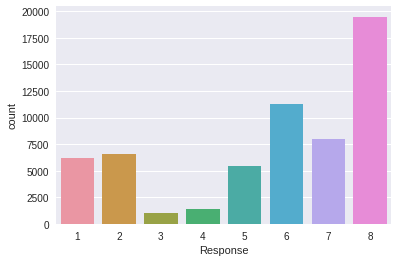

In [76]:
sns.countplot('Response',data=df_train)

In [0]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
#
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#
from sklearn.pipeline import Pipeline
#
from sklearn.utils import resample

#### Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#
import warnings
warnings.filterwarnings("ignore")

# DATA NORMALIZATION

In [0]:
X = X.astype('float32')

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 144 entries, Product_Info_1 to E1
dtypes: float32(144)
memory usage: 32.6 MB


In [0]:
scaled = StandardScaler()
X_scaled = scaled.fit_transform(X)

In [79]:
X_scaled.shape

(59381, 126)

In [80]:
X_scaled

array([[-0.16452547,  0.6452571 , -2.84173109, ..., -0.09252145,
        -0.14251185, -0.24007598],
       [-0.16452547, -2.30903124,  0.312319  , ..., -0.09252145,
        -0.14251185, -0.24007598],
       [-0.16452547,  1.01454314,  0.312319  , ..., -0.09252145,
        -0.14251185, -0.24007598],
       ...,
       [-0.16452547,  1.01454314,  0.312319  , ..., -0.09252145,
        -0.14251185, -0.24007598],
       [-0.16452547,  0.46061408, -2.84173109, ..., -0.09252145,
        -0.14251185, -0.24007598],
       [-0.16452547, -1.01653009,  0.312319  , ..., -0.09252145,
        -0.14251185, -0.24007598]])

# TRAIN TEST SPLIT the input data set

In [0]:
Y = df_train['Response'].values

In [82]:
Y.shape

(59381,)

In [83]:
#train test split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

print('training data set shape : ',X_train.shape)
print('test data set shape : ',X_test.shape)

training data set shape :  (47504, 126)
test data set shape :  (11877, 126)


In [0]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)

In [85]:
accuracy_score(y_test,predict)

0.48732844994527236

**Spot Check some Classification  Algorithms**

In [86]:
# Spot Check some Classification  Algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))

# Test options and evaluation metric
num_folds =10
seed = 1
scoring = 'accuracy'

# evaluate each model in turn
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg) 

LR - results(mean) : 0.496337 -results(std): 0.005413
KNN - results(mean) : 0.391462 -results(std): 0.010046
DT - results(mean) : 0.441731 -results(std): 0.006292
NB - results(mean) : 0.333088 -results(std): 0.005315


In [89]:
results

[array([0.49905283, 0.48600295, 0.49694801, 0.49568512, 0.50568421,
        0.48947368, 0.5       , 0.49242105, 0.49894737, 0.49915789]),
 array([0.3906546 , 0.39128605, 0.40012629, 0.39318038, 0.38315789,
        0.37831579, 0.416     , 0.39178947, 0.38652632, 0.38357895]),
 array([0.44117028, 0.43211955, 0.43569775, 0.45253631, 0.44757895,
        0.44484211, 0.44778947, 0.43642105, 0.44357895, 0.43557895]),
 array([0.33950747, 0.32330036, 0.33045675, 0.33698169, 0.32652632,
        0.33726316, 0.33010526, 0.33663158, 0.33094737, 0.33915789])]

In [0]:
r= []
for i in results:
  r.append(i[0])

In [93]:
r

[0.49905283098295095,
 0.3906545990317828,
 0.44117027994106506,
 0.3395074721111345]

In [0]:
d = pd.DataFrame({'Models':names,'Results':r})

# Visualize the Comparison of algorithms using Box Plot

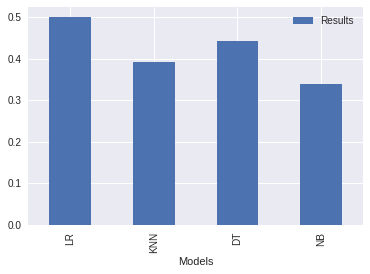

In [101]:
d.set_index('Models').plot(kind='bar')

#### Logistic Regression has better accuracy as compared to other algorithms but the accuracy is only 50%

# Comparing ensemble algorithms

#### What is an ensemble method?


The idea here is to train multiple models, each with the objective to predict or classify a set of results.

Most of the errors from a model’s learning are from three main factors:

* variance, 

* noise, and 

* bias. 


By using ensemble methods, we are able to increase the stability of the final model and reduce the errors mentioned previously. By combining many models, we’re able to (mostly) reduce the variance, even when they are individually not great, as we won’t suffer from random errors from a single source.

The main principle behind ensemble modelling is to group weak learners together to form one strong learner.

From many, together they emerge as one.

#### There are three main terms describing the ensemble (combination) of various models into one more effective model:

* Bagging to decrease the model’s variance;

* Boosting to decreasing the model’s bias, and;

* Stacking to increasing the predictive force of the classifier.



In [0]:
# Compare Algorithms

pipelines = []
pipelines.append(("AB",
                  Pipeline([("AB", AdaBoostClassifier())])))
pipelines.append(("GBM",
                  Pipeline([("GBM", GradientBoostingClassifier())])))
pipelines.append(("RF",
                  Pipeline([("RF", RandomForestClassifier())])))
pipelines.append(("ET",
                  Pipeline([("ET", ExtraTreesClassifier())])))

results = []
names = []

#
for name,model in pipelines:
    kfold = KFold(n_splits = num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg)

AB - results(mean) : 0.511704 -results(std): 0.006959
GBM - results(mean) : 0.573320 -results(std): 0.004510
RF - results(mean) : 0.511620 -results(std): 0.006809
ET - results(mean) : 0.483223 -results(std): 0.004896


In [0]:
pipelines

[('AB', Pipeline(memory=None,
       steps=[('AB', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=50, random_state=None))])),
 ('GBM', Pipeline(memory=None,
       steps=[('GBM', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100,
                presort='auto', random_state=None, subsample=1.0, verbose=0,
                warm_start=False))])),
 ('RF', Pipeline(memory=None,
       steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
        

# Compare Algorithms - Visualization

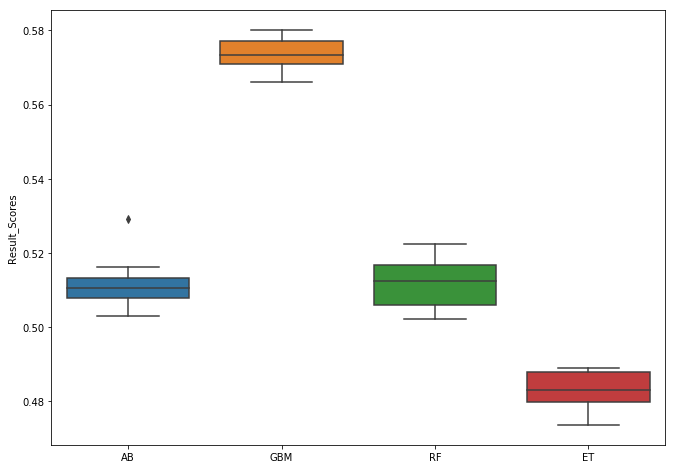

In [0]:
plt.figure(figsize=(11,8))
sns.boxplot(x=names, y=results)
plt.ylabel('Result_Scores')
plt.show()

#### Note GBM classifier has the best accuracy as compared to other Ensemble techniques

# Using XGBOOSTClassifier Boosting Method of Ensemble model

In [0]:
from xgboost.sklearn import XGBClassifier
#set the parameters for the xgbosst model
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}
params['eval_metric'] = ['logloss', 'auc']

# Train the XGBClassifier model

In [0]:
bst = XGBClassifier(**params).fit(X_train,y_train)

# Predict the Response

In [0]:
y_pred = bst.predict(X_test)

In [0]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Classification report")
print(classification_report(y_test, y_pred))

Accuracy score: 0.5232802896354298
Classification report
             precision    recall  f1-score   support

          1       0.42      0.16      0.23      1280
          2       0.45      0.17      0.24      1326
          3       0.56      0.45      0.50       194
          4       0.57      0.70      0.63       283
          5       0.52      0.57      0.55      1122
          6       0.38      0.42      0.40      2206
          7       0.41      0.27      0.33      1608
          8       0.62      0.91      0.74      3858

avg / total       0.49      0.52      0.48     11877



<Figure size 1440x792 with 0 Axes>

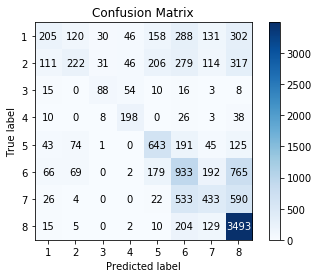

In [0]:
import scikitplot

scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

# Choose Optimal Features

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2,k=5)
X_train,X_test,y_train,y_test = train_test_split(X, df_train['Response'],test_size=0.2,random_state=1)
select_feature.fit(X_train,y_train)
print("Feature_List : ",X_train.columns)
print("Features Scores : ",np.round(np.array(select_feature.scores_),2))

Feature_List :  Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'B2', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1'],
      dtype='object', length=144)
Features Scores :  [3.2200000e+00 4.9594000e+02 5.7789000e+02 1.2000000e-01 2.0560000e+01
 1.6700000e+00 3.2291000e+02 9.4900000e+00 2.8279000e+02 3.9162000e+02
 2.5710000e+01 1.2660600e+03 3.9958000e+02 1.1790000e+01 2.3810000e+01
 1.0222000e+02 8.9820000e+01 1.5600000e+00 1.2530000e+01 3.0800000e+00
 2.9140000e+01 3.6131000e+02 3.9740000e+01 2.5600000e+01 7.7430000e+01
 1.4501000e+02 1.5005000e+02 4.8000000e-01 1.4829000e+02 1.2690000e+01
 3.3190000e+01 5.3820000e+01 1.1480000e+01 1.8900000e+00 3.3630000e+01
 8.8000000e-01 7.6506200e+03 2.9650200e+03 6.0000000e+00 9.4755000e+02
 2.7200000e+00 9.6600000e+01 1.0000000e+00 6.3300000e+00 2.9690000e+01
 1.6825570e+04 3.0000000e-01 7.0000000e+00 1.3518000e+02 7.20

In [0]:
X_train_2 = select_feature.transform(X_train)
X_train_2.shape

(47504, 5)

In [0]:
X_test_2 = select_feature.transform(X_test)
X_test_2.shape

(11877, 5)

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import classification_report_imbalanced
classifiers = {'RandomForestClassifier':RandomForestClassifier(),
               'GradientBoostingClassifier':GradientBoostingClassifier(),
               'ExtraTreesClassifier':ExtraTreesClassifier(),
               'AdaBoostClassifier':AdaBoostClassifier(),
               'LogisticRegression':LogisticRegression()}
for keys,items in classifiers.items():
  classifier = OneVsRestClassifier(items)

  # train
  classifier.fit(X_train_2, y_train)

  # predict
  predictions = classifier.predict(X_test_2)
  
  print("Accuracy_Score for {} model : {}".format(keys,accuracy_score(y_test,predictions)))
  print("="*80)
  print("classification_report_imbalanced")
  print(classification_report_imbalanced(y_test, predictions))
  print("="*80)   
 


Accuracy_Score for RandomForestClassifier model : 0.38401953355224383
classification_report_imbalanced
                   pre       rec       spe        f1       geo       iba       sup

          1       0.22      0.09      0.96      0.13      0.30      0.08      1280
          2       0.15      0.03      0.98      0.05      0.16      0.02      1326
          3       0.22      0.11      0.99      0.14      0.33      0.10       194
          4       0.37      0.55      0.98      0.44      0.73      0.52       283
          5       0.12      0.02      0.99      0.03      0.14      0.02      1122
          6       0.28      0.16      0.90      0.21      0.38      0.14      2206
          7       0.25      0.19      0.91      0.21      0.41      0.16      1608
          8       0.45      0.92      0.46      0.60      0.65      0.44      3858

avg / total       0.30      0.38      0.79      0.30      0.42      0.22     11877

Accuracy_Score for GradientBoostingClassifier model : 0.39942746

In [0]:
from sklearn.feature_selection  import RFECV
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(X_train,y_train)
print("Optimal Number of Features : ",rfecv.n_features_)
print("Best Features : ",X_train.columns[rfecv.support_])

In [0]:
#!pip install imbalanced-learn
#conda install -c conda-forge imbalanced-learn

  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:


fbprophet 0.4.post2 requires setuptools-git>=1.2, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'd:\\users\\plaban_nayak\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\sklearn\\ensemble\\_gradient_boosting.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an over-sampling method. It creates synthetic samples of the minority class.

In [0]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
x_sm,y_sm =smote.fit_sample(X_train,y_train)
print(x_sm.shape,y_sm.shape)

(62316, 144) (62316,)


In [0]:
from sklearn.multiclass import OneVsRestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import classification_report_imbalanced
classifiers = {'RandomForestClassifier':RandomForestClassifier(),
               'GradientBoostingClassifier':GradientBoostingClassifier(),
               'ExtraTreesClassifier':ExtraTreesClassifier(),
               'AdaBoostClassifier':AdaBoostClassifier(),
               'LogisticRegression':LogisticRegression()}
for keys,items in classifiers.items():
  classifier = OneVsRestClassifier(items)

  # train
  classifier.fit(x_sm, y_sm)

  # predict
  predictions = classifier.predict(X_test)
  
  print("Accuracy_Score for {} model : {}".format(keys,accuracy_score(y_test,predictions)))
  print("="*80)
  print("classification_report_imbalanced")
  print(classification_report_imbalanced(y_test, predictions))
  print("="*80)   

Accuracy_Score for RandomForestClassifier model : 0.5242906457859728
classification_report_imbalanced
                   pre       rec       spe        f1       geo       iba       sup

          1       0.41      0.16      0.97      0.23      0.39      0.14      1280
          2       0.37      0.20      0.96      0.26      0.44      0.18      1326
          3       0.35      0.53      0.98      0.42      0.72      0.49       194
          4       0.54      0.36      0.99      0.43      0.60      0.33       283
          5       0.56      0.46      0.96      0.51      0.67      0.42      1122
          6       0.43      0.45      0.87      0.44      0.62      0.37      2206
          7       0.39      0.37      0.91      0.38      0.58      0.32      1608
          8       0.63      0.89      0.75      0.74      0.82      0.68      3858

avg / total       0.50      0.52      0.87      0.49      0.64      0.42     11877

Accuracy_Score for GradientBoostingClassifier model : 0.555780079

In [0]:
# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2),
                         LinearSVC(random_state=RANDOM_STATE))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))